In [1]:
!git clone https://github.com/NabeelKhatri12/face_expression_recognition.git

fatal: destination path 'face_expression_recognition' already exists and is not an empty directory.


In [2]:
!pip install tensorflow==2.0

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
# Directory with our training pictures
train_dir_0 = os.path.join('face_expression_recognition/images/train/angry')

# Directory with our training pictures
train_dir_1 = os.path.join('face_expression_recognition/images/train/disgust')

# Directory with our training pictures
train_dir_2 = os.path.join('face_expression_recognition/images/train/fear')

# Directory with our training pictures
train_dir_3 = os.path.join('face_expression_recognition/images/train/happy')

# Directory with our training pictures
train_dir_4 = os.path.join('face_expression_recognition/images/train/neutral')

# Directory with our training pictures
train_dir_5 = os.path.join('face_expression_recognition/images/train/sad')

# Directory with our training pictures
train_dir_6 = os.path.join('face_expression_recognition/images/train/surprise')

In [5]:
train_labels_0 = os.listdir(train_dir_0)
print(train_labels_0[:10])

train_labels_1 = os.listdir(train_dir_1)
print(train_labels_1[:10])

train_labels_2 = os.listdir(train_dir_2)
print(train_labels_2[:10])

train_labels_3 = os.listdir(train_dir_3)
print(train_labels_3[:10])

train_labels_4 = os.listdir(train_dir_4)
print(train_labels_4[:10])

train_labels_5 = os.listdir(train_dir_5)
print(train_labels_5[:10])

train_labels_6 = os.listdir(train_dir_6)
print(train_labels_6[:10])

['0 (70).jpg', '0 (172).jpg', '0 (2302).jpg', '0 (3106).jpg', '0 (1986).jpg', '0 (1853).jpg', '0 (2665).jpg', '0 (273).jpg', '0 (3619).jpg', '0 (978).jpg']
['1 (96).jpg', '1 (242).jpg', '1 (109).jpg', '1 (417).jpg', '1 (46).jpg', '1 (403).jpg', '1 (141).jpg', '1 (277).jpg', '1 (18).jpg', '1 (289).jpg']
['2 (2982).jpg', '2 (2041).jpg', '2 (2423).jpg', '2 (2989).jpg', '2 (3312).jpg', '2 (2686).jpg', '2 (2505).jpg', '2 (2137).jpg', '2 (2561).jpg', '2 (2148).jpg']
['3 (2996).jpg', '3 (4329).jpg', '3 (6895).jpg', '3 (1740).jpg', '3 (7159).jpg', '3 (1346).jpg', '3 (3504).jpg', '3 (4010).jpg', '3 (4092).jpg', '3 (8).jpg']
['4 (3465).jpg', '4 (1918).jpg', '4 (507).jpg', '4 (4111).jpg', '4 (2739).jpg', '4 (4435).jpg', '4 (3114).jpg', '4 (2819).jpg', '4 (3698).jpg', '4 (1645).jpg']
['5 (2971).jpg', '5 (559).jpg', '5 (4874).jpg', '5 (4492).jpg', '5 (2226).jpg', '5 (887).jpg', '5 (2205).jpg', '5 (2724).jpg', '5 (3123).jpg', '5 (1860).jpg']
['6 (41).jpg', '6 (273).jpg', '6 (286).jpg', '6 (392).jpg'

In [0]:
# Parameters for our graph
nrows = 12
ncols = 12

# Index for iterating over images
pic_index = 0

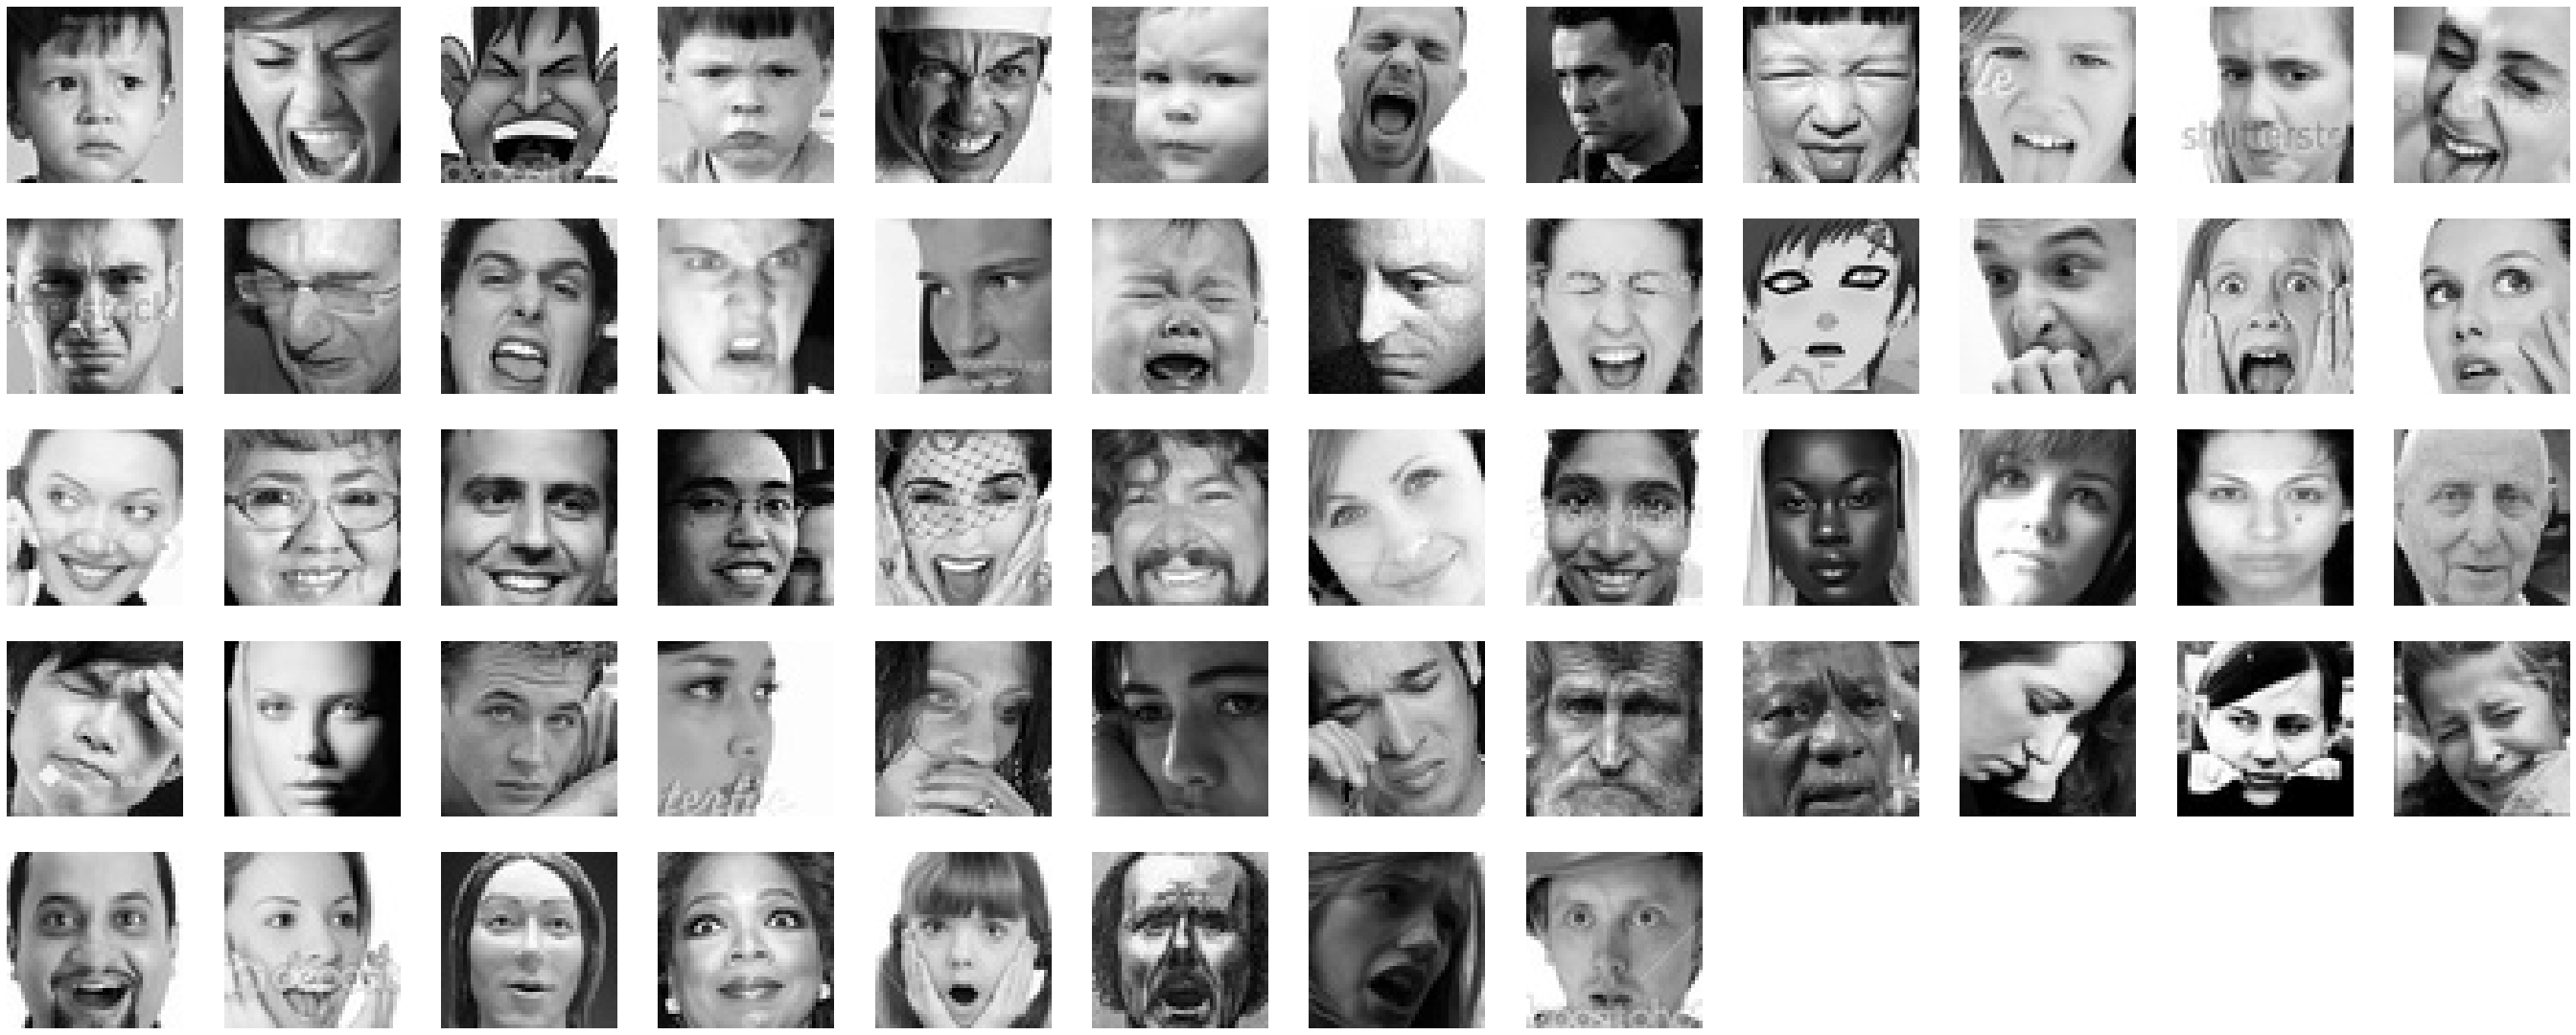

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_dir_0, fname) 
                for fname in train_labels_0[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_dir_1, fname) 
                for fname in train_labels_1[pic_index-8:pic_index]]
next_2_pix = [os.path.join(train_dir_2, fname) 
                for fname in train_labels_2[pic_index-8:pic_index]]
next_3_pix = [os.path.join(train_dir_3, fname) 
                for fname in train_labels_3[pic_index-8:pic_index]]
next_4_pix = [os.path.join(train_dir_4, fname) 
                for fname in train_labels_4[pic_index-8:pic_index]]
next_5_pix = [os.path.join(train_dir_5, fname) 
                for fname in train_labels_5[pic_index-8:pic_index]]
next_6_pix = [os.path.join(train_dir_6, fname) 
                for fname in train_labels_6[pic_index-8:pic_index]]


for i, img_path in enumerate(next_0_pix + next_1_pix + next_2_pix + next_3_pix + next_4_pix + next_5_pix + next_6_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

In [8]:
# count number of train images for each expression

for expression in os.listdir("face_expression_recognition/images/train"):
    print(str(len(os.listdir("face_expression_recognition/images/train/" + expression))) + " " + expression + " images")

4982 neutral images
436 disgust images
4103 fear images
7164 happy images
4938 sad images
3205 surprise images
3993 angry images


In [0]:
train_data_dir = 'face_expression_recognition/images/train'
validation_data_dir = 'face_expression_recognition/images/validation'

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./ 255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'face_expression_recognition/images/train', # This is the source directory for training images
        target_size = (48, 48),  # All images will be resized to 48x48
        batch_size = 32, class_mode = 'categorical', color_mode = 'grayscale',
        shuffle = True
        )

#Flow validation images in batches of 32 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        'face_expression_recognition/images/validation',  # This is the source directory for training images
        target_size=(48, 48),  # All images will be resized to 48x48
        batch_size=32, class_mode = 'categorical', color_mode = 'grayscale',
        shuffle = True
        )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [0]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer = 'he_normal', input_shape = (48, 48, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer = 'he_normal', input_shape = (48, 48, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Block 2
model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Block 3
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Block 4
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Block 5
model.add(Flatten())
model.add(Dense(64, kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Block 6
model.add(Dense(64, kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block 7
model.add(Dense(7, kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [0]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [0]:
batch_size = 32

In [0]:
checkpoint = ModelCheckpoint('face_expression_recognition/emotions.h5',
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1
                            )

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0,
                         patience = 9,
                         verbose = 1,
                         restore_best_weights = True
                         )

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.2,
                             patience = 3,
                             verbose = 1,
                             min_delta = 0.0001
                             )

callbacks = [earlystop, checkpoint, reduce_lr]

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [18]:
train_samples = 28821
validation_samples = 7066
epochs = 25

history = model.fit_generator(generator = train_generator,
                                steps_per_epoch = train_samples // batch_size,
                                epochs = epochs,
                                callbacks = callbacks,
                                validation_data = validation_generator,
                                validation_steps = validation_samples // batch_size
                                )

Epoch 1/25
899/900 [============================>.] - ETA: 0s - loss: 2.1259 - accuracy: 0.1960
Epoch 00001: val_loss improved from inf to 1.79518, saving model to face_expression_recognition/emotions.h5
900/900 [==============================] - 934s 1s/step - loss: 2.1257 - accuracy: 0.1959 - val_loss: 1.7952 - val_accuracy: 0.2482
Epoch 2/25
899/900 [============================>.] - ETA: 0s - loss: 1.8205 - accuracy: 0.2366
Epoch 00002: val_loss improved from 1.79518 to 1.77592, saving model to face_expression_recognition/emotions.h5
900/900 [==============================] - 929s 1s/step - loss: 1.8205 - accuracy: 0.2367 - val_loss: 1.7759 - val_accuracy: 0.2673
Epoch 3/25
899/900 [============================>.] - ETA: 0s - loss: 1.7883 - accuracy: 0.2543
Epoch 00003: val_loss improved from 1.77592 to 1.76484, saving model to face_expression_recognition/emotions.h5
900/900 [==============================] - 936s 1s/step - loss: 1.7883 - accuracy: 0.2544 - val_loss: 1.7648 - val_a